In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:/DIKA/DATA PRODUKTIF DIKA/DATA SCIENCE/Rakamin/Mini project/Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **Handling Duplicated Data**

In [228]:
df.duplicated().sum()

33261

In [229]:
duplicate = df[df.duplicated(keep=False)]
print('Duplicated Rows: ')
duplicate.head(6)

Duplicated Rows: 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
21,Resort Hotel,0,72,2017,September,27,1,2,4,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
39,Resort Hotel,0,70,2017,September,27,2,2,3,2,0.0,0,Dinner,Kabupaten Tangerang,Direct,Direct,0,0,0,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,0.0,0,Dinner,Kabupaten Tangerang,Direct,Direct,0,0,0,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out


In [230]:
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()
print('Duplicated Rows: ')
print(df_clean.duplicated().sum())

Duplicated Rows: 
0


## **Handling Missing Values**

In [4]:
df_clean = df.copy()

In [5]:
missing_value = df_clean.isna().sum() *100/len(df)
print(round(missing_value, 4).sort_values(ascending=False))

company                           94.3069
agent                             13.6862
city                               0.4087
children                           0.0034
hotel                              0.0000
is_repeated_guest                  0.0000
total_of_special_requests          0.0000
required_car_parking_spaces        0.0000
adr                                0.0000
customer_type                      0.0000
days_in_waiting_list               0.0000
deposit_type                       0.0000
booking_changes                    0.0000
previous_bookings_not_canceled     0.0000
previous_cancellations             0.0000
market_segment                     0.0000
distribution_channel               0.0000
is_canceled                        0.0000
meal                               0.0000
babies                             0.0000
adults                             0.0000
stays_in_weekdays_nights           0.0000
stays_in_weekend_nights            0.0000
arrival_date_day_of_month         

In [6]:
df_clean['company'] = df_clean['company'].fillna(0)
df_clean['agent'] = df_clean['agent'].fillna(0)
df_clean['children'] = df_clean['children'].fillna(0)
df_clean['city'] = df_clean['city'].fillna('unknown')

## **Correcting Unsuitable Value**

In [7]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [8]:
df_clean = df_clean.replace({'meal': {'Undefined':'No Meal'}})
df_clean['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [9]:
df_clean['children'] = df_clean['children'].astype('int64')
df_clean['agent'] = df_clean['agent'].astype('int64')
df_clean['company'] = df_clean['company'].astype('int64')

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

## **Drop Unnecesary Data**

In [11]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df_clean[df_clean['total_guests'] == 0].shape[0], df_clean.shape[0]))
df_clean['stay_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df_clean[df_clean['stay_duration'] == 0].shape[0], df_clean.shape[0]))

# Pick the necessary data
df_clean_fix = df_clean[(df_clean['total_guests'] > 0) & (df_clean['stay_duration'] > 0)]

print('before pre-processing:', df_clean.shape[0])
print('after pre-processing:', df_clean_fix.shape[0])

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data
before pre-processing: 119390
after pre-processing: 118565


In [12]:
df_final = df_clean_fix.copy()

## **Unsuitable Date of Month**

*Fix February*

In [240]:
df_february =  df_final[(df_final['arrival_date_month']=='February') & ( df_final["arrival_date_day_of_month"]>28)]
df_february.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
3644,Resort Hotel,1,75,2017,February,53,29,0,4,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,66.83,0,1,Canceled,2,4
3645,Resort Hotel,0,94,2017,February,53,29,2,7,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,241,0,0,Personal,73.70,0,1,Check-Out,2,9
3646,Resort Hotel,1,160,2017,February,53,29,2,8,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,240,0,0,Personal,62.88,0,2,Canceled,2,10
3647,Resort Hotel,0,76,2017,February,53,30,0,3,2,1,0,Dinner,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,204.33,1,1,Check-Out,3,3
3648,Resort Hotel,0,165,2017,February,53,30,0,4,2,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,308,0,122,Family,136.50,0,0,Check-Out,2,4


In [241]:
df_march_new = df_february.drop(df_february[df_february['arrival_date_year']==2017].index)
df_march_new = df_march_new.replace({'arrival_date_month':{'February':'March'}, 'arrival_date_day_of_month':{29:1, 30:2, 31:3}})
df_march_new.groupby(['arrival_date_year','arrival_date_month','arrival_date_day_of_month']).count()

hotel  \
arrival_date_year arrival_date_month arrival_date_day_of_month          
2018              March              1                            162   
                                     2                            236   
                                     3                             76   

                                                                is_canceled  \
arrival_date_year arrival_date_month arrival_date_day_of_month                
2018              March              1                                  162   
                                     2                                  236   
                                     3                                   76   

                                                                lead_time  \
arrival_date_year arrival_date_month arrival_date_day_of_month              
2018              March              1                                162   
                                     2                                236   
                                     3                                 76   

                                                                arrival_date_week_number  \
arrival_date_year arrival_date_month arrival_date_day_of_month                             
2018              March              1                                               162   
                                     2                                               236   
                                     3                                                76   

                                                                stays_in_weekend_nights  \
arrival_date_year arrival_date_month arrival_date_day_of_month                            
2018              March              1                                              162   
                                     2                                              236   
                                     3                                               76   

                                                                stays_in_weekdays_nights  \
arrival_date_year arrival_date_month arrival_date_day_of_month                             
2018              March              1                                               162   
                                     2                                               236   
                                     3                                                76   

                                                                adults  \
arrival_date_year arrival_date_month arrival_date_day_of_month           
2018              March              1                             162   
                                     2                             236   
                                     3                              76   

                                                                children  \
arrival_date_year arrival_date_month arrival_date_day_of_month             
2018              March              1                               162   
                                     2                               236   
                                     3                                76   

                                                                babies  meal  \
arrival_date_year arrival_date_month arrival_date_day_of_month                 
2018              March              1                             162   162   
                                     2                             236   236   
                                     3                              76    76   

                                                                city  \
arrival_date_year arrival_date_month arrival_date_day_of_month         
2018              March              1                           162   
                                     2                           236   
                                     3                            76   

                        

# EDA

In [13]:
df_final.shape

(118565, 31)

## **Monthly Booking Analysis**

In [243]:
df_final.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).agg({'is_canceled':'count'})

is_canceled
hotel        arrival_date_month arrival_date_year             
City Hotel   April              2018                      2347
                                2019                      2570
             August             2018                      3914
                                2019                      3960
             December           2017                      3368
                                2018                      4186
             February           2017                      1637
                                2018                      2460
             January            2017                      1225
                                2018                      3084
             July               2018                      3640
                                2019                      4544
             June               2018                      3549
                                2019                      3909
             March              2018                      1355
                                2019                      2357
             May                2018                      3028
                                2019                      3383
             November           2017                      3516
                                2018                      3861
             October            2017                      2471
                                2018                      3362
                                2019                      3119
             September          2017                      1393
                                2018                      3107
                                2019                      3554
Resort Hotel April              2018                      1509
                                2019                      1572
             August             2018                      1345
                                2019                      1672
             December           2017                      1548
                                2018                      1962
             February           2017                      1239
                                2018                      1353
             January            2017                      1088
                                2018                      1315
             July               2018                      1773
                                2019                      1747
             June               2018                      1848
                                2019                      1739
             March              2018                       866
                                2019                      1293
             May                2018                      1754
                                2019                      1551
             November           2017                      1582
                                2018                      1518
             October            2017                      1392
                                2018                      1672
                                2019                      1796
             September          2017                      1361
                                2018                      1427
                                2019                      1744

In [178]:
#create total of booking per hotel, month and year
df_monthly = df_final.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).agg({'is_canceled':'count'}).reset_index()

#create ammout of year per hotel and month
df_monthly_year = df_monthly.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year':'count'})
df_monthly= df_monthly.merge(df_monthly_year, on = ['hotel', 'arrival_date_month'])
df_monthly.rename(columns={'is_canceled':'total_booking', 'arrival_date_year_x':'arrival_date_year', 'arrival_date_year_y':'ammount_of_year'}, inplace=True)

#Create total of booking per hotel and month
df_monthly_sum = df_monthly.groupby(['hotel', 'arrival_date_month']).agg({'total_booking':'sum'})
df_monthly_sum.rename(columns={'total_booking':'sum_booking'}, inplace=True)
df_monthly = df_monthly.merge(df_monthly_sum, on=['hotel', 'arrival_date_month'])

#create average num booking per hotel, month and year
df_monthly['avg_num_booking'] = round(df_monthly['sum_booking']/df_monthly['ammount_of_year'])


#create percentage of bookign distrubution per month and hotel
#df_monthly['percentage'] = round((df_monthly['avg_num_booking']/df_monthly.groupby(['hotel', 'arrival_date_month']).agg({'avg_num_booking':'sum'}).reset_index())*100, 2)
df_monthly.sample(10)

,hotel,arrival_date_month,arrival_date_year,total_booking,ammount_of_year,sum_booking,avg_num_booking
18,City Hotel,November,2017,3516,2,7377,3688.0
14,City Hotel,March,2018,1355,2,3712,1856.0
37,Resort Hotel,July,2019,1747,2,3520,1760.0
36,Resort Hotel,July,2018,1773,2,3520,1760.0
23,City Hotel,September,2017,1393,3,8054,2685.0
27,Resort Hotel,April,2019,1572,2,3081,1540.0
4,City Hotel,December,2017,3368,2,7554,3777.0
22,City Hotel,October,2019,3119,3,8952,2984.0
31,Resort Hotel,December,2018,1962,2,3510,1755.0
2,City Hotel,August,2018,3914,2,7874,3937.0


In [179]:
table = pd.pivot_table(data=df_monthly, 
                        index=['arrival_date_month'], 
                        columns=['hotel'], 
                        values='avg_num_booking')
table

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,2458.0,1540.0
August,3937.0,1508.0
December,3777.0,1755.0
February,2048.0,1296.0
January,2154.0,1202.0
July,4092.0,1760.0
June,3729.0,1794.0
March,1856.0,1080.0
May,3206.0,1652.0


In [180]:
df_monthly_final = df_monthly.copy()
df_monthly_final = df_monthly_final.replace({'arrival_date_month': {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
                                            'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}})
table = pd.pivot_table(data=df_monthly_final, 
                        index=['arrival_date_month'], 
                        columns=['hotel'], 
                        values='avg_num_booking')
table

hotel,City Hotel,Resort Hotel
arrival_date_month,,
1,2154.0,1202.0
2,2048.0,1296.0
3,1856.0,1080.0
4,2458.0,1540.0
5,3206.0,1652.0
6,3729.0,1794.0
7,4092.0,1760.0
8,3937.0,1508.0
9,2685.0,1511.0


In [181]:
#selecting important column to create percentage column
df_monthly_pct = df_monthly_final[['hotel', 'arrival_date_month', 'avg_num_booking']]

#there're duplciated data cause by previous processes (multiple value based on year column)
df_monthly_pct = df_monthly_pct.drop_duplicates()

#summarize total of avg num booking based on hotel type
df_part = df_monthly_pct.groupby('hotel').agg({'avg_num_booking':'sum'})
df_part.rename(columns={'avg_num_booking':'total_avg_num_booking'}, inplace=True)
df_monthly_pct = df_monthly_pct.merge(df_part, on='hotel')

#create percentage column based on avg num booking per hotel type
df_monthly_pct['percentage'] = round((df_monthly_pct['avg_num_booking']/df_monthly_pct['total_avg_num_booking'])*100, 2)
df_monthly_pct.sort_values('arrival_date_month', ascending=True)


,hotel,arrival_date_month,avg_num_booking,total_avg_num_booking,percentage
4,City Hotel,1,2154.0,36614.0,5.88
16,Resort Hotel,1,1202.0,18268.0,6.58
3,City Hotel,2,2048.0,36614.0,5.59
15,Resort Hotel,2,1296.0,18268.0,7.09
7,City Hotel,3,1856.0,36614.0,5.07
19,Resort Hotel,3,1080.0,18268.0,5.91
0,City Hotel,4,2458.0,36614.0,6.71
12,Resort Hotel,4,1540.0,18268.0,8.43
20,Resort Hotel,5,1652.0,18268.0,9.04
8,City Hotel,5,3206.0,36614.0,8.76


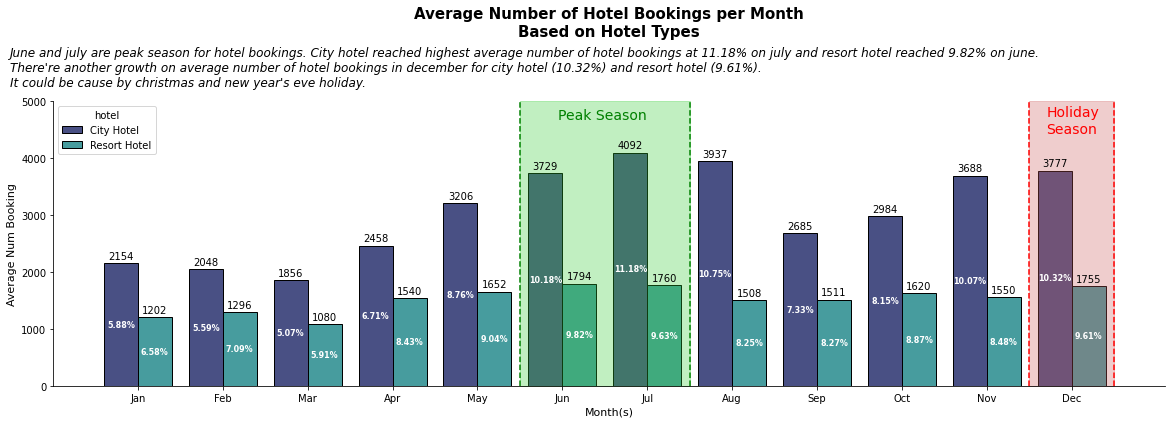

In [184]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Average Number of Hotel Bookings per Month\nBased on Hotel Types", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1.5, y=5250, s="June and july are peak season for hotel bookings. City hotel reached highest average number of hotel bookings at 11.18% on july and resort hotel reached 9.82% on june.\nThere're another growth on average number of hotel bookings in december for city hotel (10.32%) and resort hotel (9.61%).\nIt could be cause by christmas and new year's eve holiday.", fontsize=12, fontstyle='italic')
sns.barplot(x='arrival_date_month', y='avg_num_booking', data=df_monthly_final, hue='hotel', edgecolor='black', palette='mako')

plt.xlabel('Month(s)', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Num Booking', fontsize=11)
plt.ylim(0, 5000)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='green')
plt.axvline(6.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,7.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=4.95, y=4750, s='Peak Season', fontsize=14, color='green', va='center')

plt.axvline(10.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(10.5,12.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=10.7, y=4650, s='Holiday\nSeason', fontsize=14, color='red', va='center')

plt.bar_label(ax.containers[0], ['5.88%', '5.59%', '5.07%', '6.71%', '8.76%', '10.18%', '11.18%', '10.75%', '7.33%', '8.15%', '10.07%', '10.32%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['6.58%', '7.09%', '5.91%', '8.43%', '9.04%', '9.82%', '9.63%', '8.25%', '8.27%', '8.87%', '8.48%', '9.61%'], label_type='center', color='white', weight='bold', fontsize=8)

sns.despine()
plt.tight_layout()
plt.savefig('avg_num_booking.png', dpi=200)

## **Impact Analaysis of Stay Duration on Hotel Bookings Cancellation Rates**

In [15]:
df_final['stay_duration'].value_counts()

2     27632
3     27064
1     21005
4     17373
7      8648
5      7771
6      3846
8      1155
10     1135
14      913
9       840
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: stay_duration, dtype: int64

In [151]:
duration_list = []
for i in df_final['stay_duration']:
    if i >= 1 and i <= 7:
        group = '1 Week'
    elif i >= 8 and i <= 14:
        group = '2 Weeks'
    elif i >= 15 and i <= 21:
        group = '3 Weeks'
    else: 
        group = '4 Weeks'
    duration_list.append(group)
df_final['stay_duration_group'] = duration_list

In [152]:
df_final['stay_duration_group'].value_counts()

1 Week     113339
2 Weeks      4797
3 Weeks       274
4 Weeks       155
Name: stay_duration_group, dtype: int64

In [172]:
df_task3 = df_final.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df_task3.rename(columns={'agent':'num_booking'}, inplace=True)

#create sum booking column
df_sum = df_task3.groupby(['hotel', 'stay_duration_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
df_task3 = df_task3.merge(df_sum, on=['hotel', 'stay_duration_group'])

#create cancellation rate
df_task3['cancellation_rate'] = round((df_task3['num_booking']/df_task3['sum_booking'])*100, 2)
df_task3

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Week,0,45287,77678,58.30
1,City Hotel,1 Week,1,32391,77678,41.70
2,City Hotel,2 Weeks,0,511,1069,47.80
3,City Hotel,2 Weeks,1,558,1069,52.20
4,City Hotel,3 Weeks,0,29,105,27.62
5,City Hotel,3 Weeks,1,76,105,72.38
6,City Hotel,4 Weeks,0,6,47,12.77
7,City Hotel,4 Weeks,1,41,47,87.23
8,Resort Hotel,1 Week,0,25754,35661,72.22
9,Resort Hotel,1 Week,1,9907,35661,27.78


In [173]:
#pick the data that hotels has been cancelled
df_task3_plot = df_task3[df_task3['is_canceled']==1].sort_values('stay_duration_group', ascending=True)
df_task3_plot

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Week,1,32391,77678,41.70
9,Resort Hotel,1 Week,1,9907,35661,27.78
3,City Hotel,2 Weeks,1,558,1069,52.20
11,Resort Hotel,2 Weeks,1,1078,3728,28.92
5,City Hotel,3 Weeks,1,76,105,72.38
13,Resort Hotel,3 Weeks,1,79,169,46.75
7,City Hotel,4 Weeks,1,41,47,87.23
15,Resort Hotel,4 Weeks,1,46,108,42.59


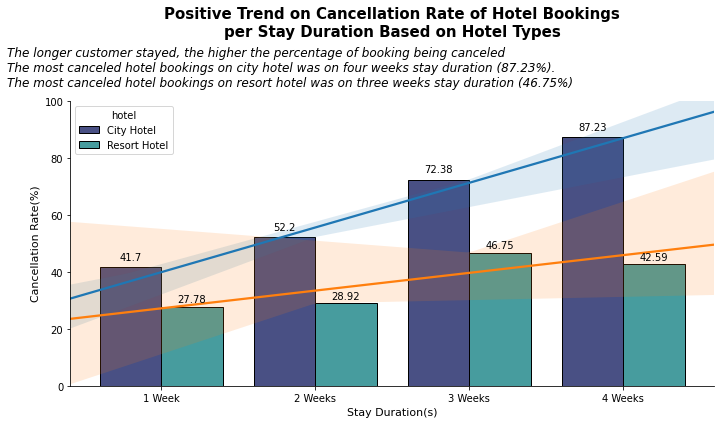

In [185]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Positive Trend on Cancellation Rate of Hotel Bookings\nper Stay Duration Based on Hotel Types", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1, y=105, s="The longer customer stayed, the higher the percentage of booking being canceled\nThe most canceled hotel bookings on city hotel was on four weeks stay duration (87.23%).\nThe most canceled hotel bookings on resort hotel was on three weeks stay duration (46.75%)", fontsize=12, fontstyle='italic')
sns.barplot(x='stay_duration_group', y='cancellation_rate', data=df_task3_plot, hue='hotel', edgecolor='black', palette='mako')

sns.regplot(x=np.arange(0, len(df_task3_plot[df_task3_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df_task3_plot[df_task3_plot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df_task3_plot[df_task3_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df_task3_plot[df_task2_plot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_stayduration.png', dpi=200)

## **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

In [117]:
df_final['lead_time'].value_counts()

0      6007
1      3386
2      2042
3      1804
4      1697
       ... 
389       1
387       1
400       1
370       1
463       1
Name: lead_time, Length: 478, dtype: int64

In [123]:
lead_time_list=[]
for i in df_final['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_list.append(lead_group)
df_final['lead_time_group'] = lead_time_list

In [124]:
df_final['lead_time_group'].value_counts()

2-4 Months      39851
1 Month         38094
5-7 Months      21619
8-10 Months     11122
>12 Months       4465
11-12 Months     3414
Name: lead_time_group, dtype: int64

In [125]:
df_task4 = df_final.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df_task4.rename(columns={'agent':'num_booking'}, inplace=True)

#create sum booking column
df_sum = df_task4.groupby(['hotel', 'lead_time_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
df_task4 = df_task4.merge(df_sum, on=['hotel', 'lead_time_group'])

#create cancellation rate
df_task4['cancellation_rate'] = round((df_task4['num_booking']/df_task4['sum_booking'])*100, 2)
df_task4

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Month,0,17848,23022,77.53
1,City Hotel,1 Month,1,5174,23022,22.47
2,City Hotel,11-12 Months,0,566,2506,22.59
3,City Hotel,11-12 Months,1,1940,2506,77.41
4,City Hotel,2-4 Months,0,16406,28189,58.20
5,City Hotel,2-4 Months,1,11783,28189,41.80
6,City Hotel,5-7 Months,0,7298,14349,50.86
7,City Hotel,5-7 Months,1,7051,14349,49.14
8,City Hotel,8-10 Months,0,2760,7136,38.68
9,City Hotel,8-10 Months,1,4376,7136,61.32


In [128]:
#pick the data that hotels has been cancelled
df_task4_plot = df_task4[df_task4['is_canceled']==1]
df_task4_plot

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Month,1,5174,23022,22.47
3,City Hotel,11-12 Months,1,1940,2506,77.41
5,City Hotel,2-4 Months,1,11783,28189,41.80
7,City Hotel,5-7 Months,1,7051,14349,49.14
9,City Hotel,8-10 Months,1,4376,7136,61.32
11,City Hotel,>12 Months,1,2742,3697,74.17
13,Resort Hotel,1 Month,1,1976,15072,13.11
15,Resort Hotel,11-12 Months,1,395,908,43.50
17,Resort Hotel,2-4 Months,1,3999,11662,34.29
19,Resort Hotel,5-7 Months,1,2685,7270,36.93


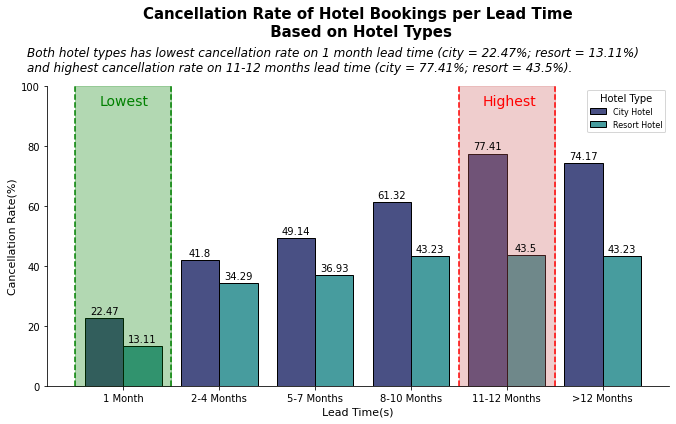

In [186]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Cancellation Rate of Hotel Bookings per Lead Time\n Based on Hotel Types", fontsize=15, color='black', weight='bold', pad=50)
plt.text(x=-1, y=105, s="Both hotel types has lowest cancellation rate on 1 month lead time (city = 22.47%; resort = 13.11%)\nand highest cancellation rate on 11-12 months lead time (city = 77.41%; resort = 43.5%).", fontsize=12, fontstyle='italic')
sns.barplot(x='lead_time_group', y='cancellation_rate', data=df_task4_plot, hue='hotel', order=['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months'], edgecolor='black', palette='mako')

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), [[100]], color='indianred', alpha=0.3)
plt.text(x=3.75, y=95, s='Highest', fontsize=14, color='red', va='center')

plt.axvline(0.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='green', alpha=0.3)
plt.text(x=-0.25, y=95, s='Lowest', fontsize=14, color='green', va='center')

plt.legend(title='Hotel Type', prop={'size':8}, loc=1)

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_leadtime.png', dpi=200)